In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import pandas as pd
import glob
from astropy.table import vstack
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df = pd.read_csv("../Class_wise_v4/Halpha_emitter_wise_group4-simbad.csv")
len(df)

202

In [3]:
#creating colors

df["r_Ha"] = df["rImag"] - df["Hamag"]
df["g_Ha"] = df["gmag"] - df["Hamag"]
df["i_Ha"] = df["imag"] - df["Hamag"]
df["W1_W2"] = df["W1mag"] - df["W2mag"]
df["J_H"] = df["Jmag"] - df["Hmag"]
df["H_W2"] = df["Hmag"] - df["W2mag"]
df["J_W2"] = df["Jmag"] - df["W2mag"]
df["g_r"] = df["gmag"] - df["rImag"]
df["g_W1"] = df["gmag"] - df["W1mag"]
df["g_W2"] = df["gmag"] - df["W2mag"]
df["r_W1"] = df["rImag"] - df["W1mag"]
df["r_W2"] = df["rImag"] - df["W2mag"]
df["g_H"] = df["gmag"] - df["Hmag"]
df["g_J"] = df["gmag"] - df["Jmag"]
df["r_H"] = df["rImag"] - df["Hmag"]
df["r_J"] = df["rImag"] - df["Jmag"]

In [4]:
# Clases SIMBAD en el Grupo 4
classes = df["main_type"].unique()

In [5]:
classes

array(['PlanetaryNeb', 'BYDraV*', 'EmLine*', 'RSCVnV*', 'YSO',
       'YSO_Candidate', 'PlanetaryNeb_Candidate', 'OrionV*', 'EclBin',
       'TTauri*', 'LongPeriodV*', 'Star', 'TTauri*_Candidate',
       'RRLyrae_Candidate'], dtype=object)

In [6]:
# Paleta de colores para cada clase
palette = sns.color_palette("husl", n_colors=len(classes))

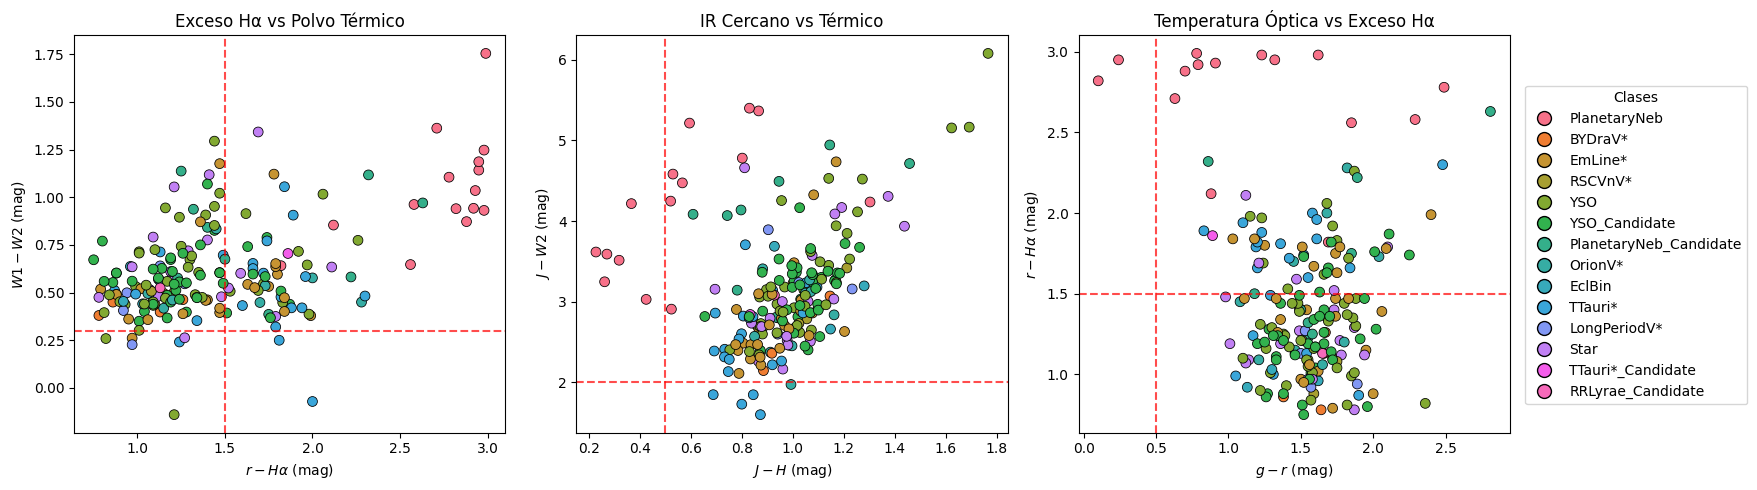

In [44]:
# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Diagrama 1: r-Ha vs W1-W2 ---
sns.scatterplot(
    x="r_Ha", y="W1_W2", 
    hue="main_type", palette=palette, 
    data=df, ax=axes[0], s=50, edgecolor='black',
    legend=False  # Sin leyenda individual
)
axes[0].axvline(1.5, color='red', linestyle='--', alpha=0.7)
axes[0].axhline(0.3, color='red', linestyle='--', alpha=0.7)
axes[0].set_xlabel(r"$r - H\alpha$ (mag)")
axes[0].set_ylabel(r"$W1 - W2$ (mag)")
axes[0].set_title("Exceso Hα vs Polvo Térmico")

# --- Diagrama 2: J-H vs H-W2 ---
sns.scatterplot(
    x="J_H", y="J_W2", 
    hue="main_type", palette=palette, 
    data=df, ax=axes[1], s=50, edgecolor='black',
    legend=False  # Sin leyenda individual
)
axes[1].axvline(0.5, color='red', linestyle='--', alpha=0.7)
axes[1].axhline(2.0, color='red', linestyle='--', alpha=0.7)
axes[1].set_xlabel(r"$J - H$ (mag)")
axes[1].set_ylabel(r"$J - W2$ (mag)")
axes[1].set_title("IR Cercano vs Térmico")

# --- Diagrama 3: g-r vs r-Ha ---
sns.scatterplot(
    x="g_r", y="r_Ha", 
    hue="main_type", palette=palette, 
    data=df, ax=axes[2], s=50, edgecolor='black',
    legend=False  # Sin leyenda individual
)
axes[2].axvline(0.5, color='red', linestyle='--', alpha=0.7)
axes[2].axhline(1.5, color='red', linestyle='--', alpha=0.7)
axes[2].set_xlabel(r"$g - r$ (mag)")
axes[2].set_ylabel(r"$r - H\alpha$ (mag)")
axes[2].set_title("Temperatura Óptica vs Exceso Hα")

# Crear leyenda única manualmente
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cls,
                          markerfacecolor=palette[i], markersize=10,
                          markeredgecolor='black')
                  for i, cls in enumerate(classes)]

fig.legend(handles=legend_elements, title="Clases",
           bbox_to_anchor=(0.85, 0.5), loc='center left',
           borderaxespad=0.)

# Ajustar layout para dejar espacio a la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Grouping

In [8]:

# 1. Crear mapeo de colores original
original_classes = df['main_type'].unique()
original_palette = sns.color_palette("husl", n_colors=len(original_classes))
original_color_dict = dict(zip(original_classes, original_palette))

In [9]:
# 2. Crear nueva columna con agrupaciones específicas
df['grouped_class'] = np.select(
    [
        df['main_type'].str.contains('YSO|TTauri')     # Grupo 2
    ],
    [
        'YSO_TTauri_Group'     # Clase unificada para YSO/TTauri y candidatos
    ],
    default=df['main_type']  # Clases no modificadas
)


In [10]:
# 3. Definir paleta de marcadores SOLO RELLENOS
unique_classes = df['grouped_class'].unique()
markers = ['o', 's', '^', 'D', '*', 'o', 'P', 'X', 'h', 'H', 'p']  # 10 marcadores rellenos
marker_dict = dict(zip(unique_classes, markers[:len(unique_classes)]))

In [11]:
# 4. Crear paleta de colores para clases agrupadas
grouped_color_dict = {}

for cls in unique_classes:
    if cls == 'YSO_TTauri_Group':
        grouped_color_dict[cls] = original_color_dict['YSO']
    else:
        grouped_color_dict[cls] = original_color_dict[cls]


In [12]:
PN = df[df["grouped_class"]=="PlanetaryNeb_Group"]
len(PN)

0

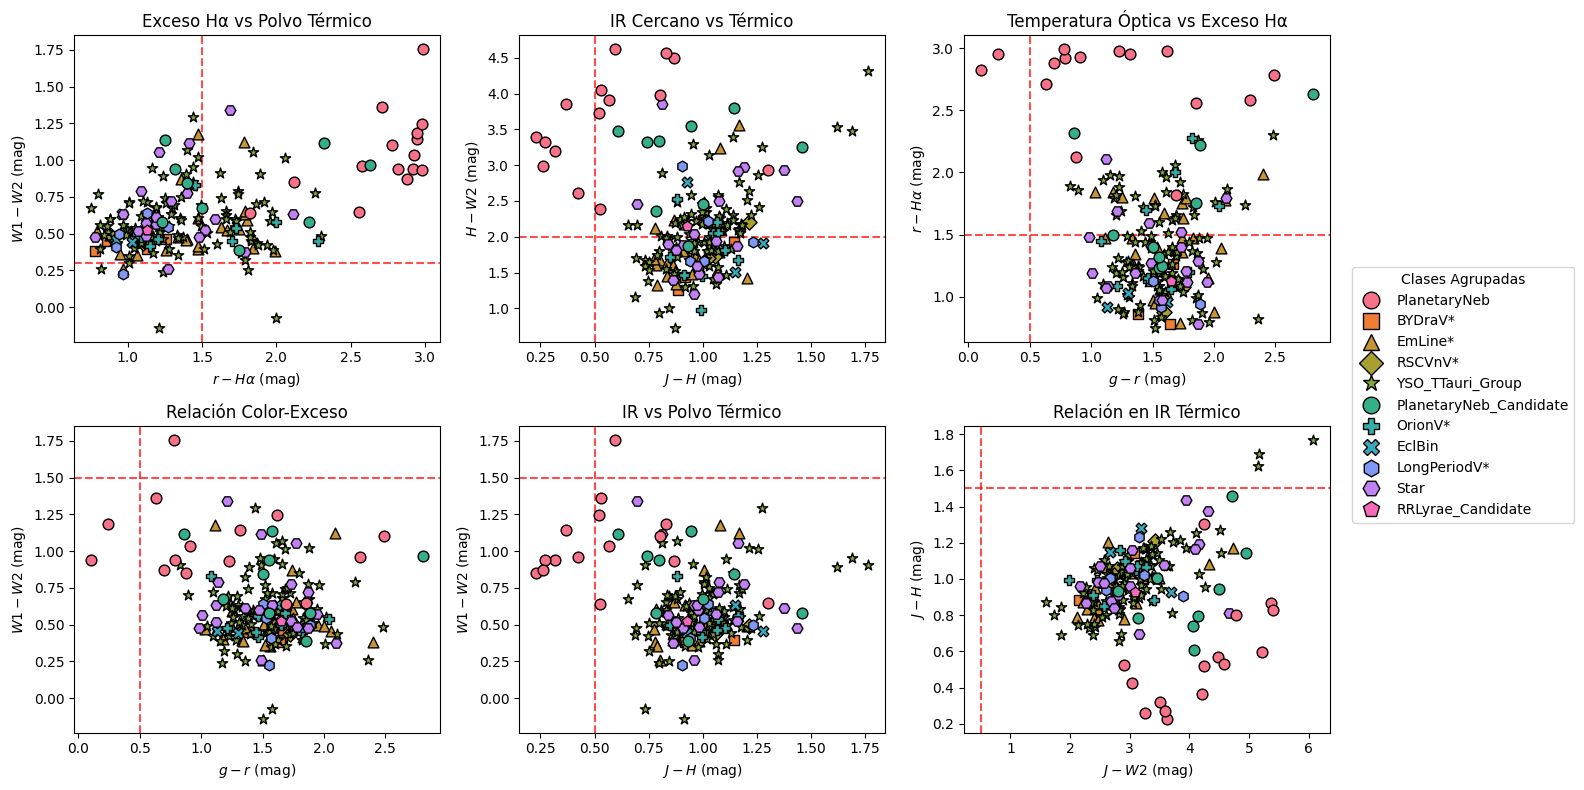

In [50]:


# 1. Definir marcadores, colores, clases, etc.
#    (asumo que ya tienes `unique_classes`, `grouped_color_dict` y `marker_dict`)

# 2. Crear subplots en formato 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

# 3. Añadir líneas guía según posición
for i, ax in enumerate(axes):
    if i == 0:
        ax.axvline(1.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(0.3, color='red', linestyle='--', alpha=0.7, zorder=1)
    elif i == 1:
        ax.axvline(0.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(2.0, color='red', linestyle='--', alpha=0.7, zorder=1)
    else:
        ax.axvline(0.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(1.5, color='red', linestyle='--', alpha=0.7, zorder=1)

# 4. Función corregida para graficar con zorder personalizado
def plot_with_zorder(ax, x, y, grouped_classes, color_dict, marker_dict, data):
    for cls in grouped_classes:
        subset = data[data['grouped_class'] == cls]
        # Solo estas dos clases encima
        if cls in ['PlanetaryNeb', 'PlanetaryNeb_Candidate']:
            z = 3
        else:
            z = 2
        ax.scatter(
            subset[x], subset[y],
            color=color_dict[cls],
            marker=marker_dict[cls],
            s=60,
            edgecolor='black',
            label=cls,
            zorder=z
        )

# 5. Graficar cada diagrama
# Diagrama 1
plot_with_zorder(axes[0], "r_Ha", "W1_W2", unique_classes,
                 grouped_color_dict, marker_dict, df)
axes[0].set(xlabel=r"$r - H\alpha$ (mag)",
            ylabel=r"$W1 - W2$ (mag)",
            title="Exceso Hα vs Polvo Térmico")

# Diagrama 2
plot_with_zorder(axes[1], "J_H", "H_W2", unique_classes,
                 grouped_color_dict, marker_dict, df)
axes[1].set(xlabel=r"$J - H$ (mag)",
            ylabel=r"$H - W2$ (mag)",
            title="IR Cercano vs Térmico")

# Diagrama 3
plot_with_zorder(axes[2], "g_r", "r_Ha", unique_classes,
                 grouped_color_dict, marker_dict, df)
axes[2].set(xlabel=r"$g - r$ (mag)",
            ylabel=r"$r - H\alpha$ (mag)",
            title="Temperatura Óptica vs Exceso Hα")

# Diagrama 4
plot_with_zorder(axes[3], "g_r", "W1_W2", unique_classes,
                 grouped_color_dict, marker_dict, df)
axes[3].set(xlabel=r"$g - r$ (mag)",
            ylabel=r"$W1 - W2$ (mag)",
            title="Relación Color-Exceso")

# Diagrama 5
plot_with_zorder(axes[4], "J_H", "W1_W2", unique_classes,
                 grouped_color_dict, marker_dict, df)
axes[4].set(xlabel=r"$J - H$ (mag)",
            ylabel=r"$W1 - W2$ (mag)",
            title="IR vs Polvo Térmico")

# Diagrama 6
plot_with_zorder(axes[5], "J_W2", "J_H", unique_classes,
                 grouped_color_dict, marker_dict, df)
axes[5].set(xlabel=r"$J - W2$ (mag)",
            ylabel=r"$J - H$ (mag)",
            title="Relación en IR Térmico")

# 6. Leyenda única
legend_elements = [
    Line2D([0], [0],
           marker=marker_dict[cls],
           color='w',
           markerfacecolor=grouped_color_dict[cls],
           markersize=12,
           markeredgecolor='black',
           label=cls,
           linestyle='None')
    for cls in unique_classes
]
fig.legend(handles=legend_elements,
           title="Clases Agrupadas",
           bbox_to_anchor=(0.75, 0.5),
           loc='center left',
           frameon=True)

# 7. Ajustes finales
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.savefig("../color-diagrams_grupo4.pdf")
plt.show()

## More color color diagrams

In [46]:
# Lista de columnas de color definidas
color_columns = [
    "r_Ha", "g_Ha", "i_Ha", "W1_W2", "J_H", "H_W2", "J_W2",
    "g_r", "g_W1", "g_W2", "r_W1", "r_W2", "g_H", "g_J", "r_H", "r_J"
]

In [47]:
#Generar todas las combinaciones posibles (x, y) donde x != y
all_pairs = [(x, y) for x in color_columns for y in color_columns if x != y]

In [16]:
#
# Configuración de parámetros
plots_per_page = 20  # 4 filas x 5 columnas
num_pages = (len(all_pairs) + plots_per_page - 1) // plots_per_page

# Exploring the Noise groups

In [18]:
df_noise = pd.read_csv("../Class_wise_v4/Halpha_emitter_wise_noise-simbad.csv")
len(df_noise)

995

In [21]:
#creating colors

df_noise["r_Ha"] = df_noise["rImag"] - df_noise["Hamag"]
df_noise["g_Ha"] = df_noise["gmag"] - df_noise["Hamag"]
df_noise["i_Ha"] = df_noise["imag"] - df_noise["Hamag"]
df_noise["W1_W2"] = df_noise["W1mag"] - df_noise["W2mag"]
df_noise["J_H"] = df_noise["Jmag"] - df_noise["Hmag"]
df_noise["H_W2"] = df_noise["Hmag"] - df_noise["W2mag"]
df_noise["J_W2"] = df_noise["Jmag"] - df_noise["W2mag"]
df_noise["g_r"] = df_noise["gmag"] - df_noise["rImag"]
df_noise["g_W1"] = df_noise["gmag"] - df_noise["W1mag"]
df_noise["g_W2"] = df_noise["gmag"] - df_noise["W2mag"]
df_noise["r_W1"] = df_noise["rImag"] - df_noise["W1mag"]
df_noise["r_W2"] = df_noise["rImag"] - df_noise["W2mag"]
df_noise["g_H"] = df_noise["gmag"] - df_noise["Hmag"]
df_noise["g_J"] = df_noise["gmag"] - df_noise["Jmag"]
df_noise["r_H"] = df_noise["rImag"] - df_noise["Hmag"]
df_noise["r_J"] = df_noise["rImag"] - df_noise["Jmag"]

In [31]:
# 1. Extraer clases originales
original_classes_noise = df_noise['main_type'].unique()

# 2. Crear paleta de colores para esas clases
original_palette_noise = sns.color_palette("husl", n_colors=len(original_classes_noise))

# 3. Mapear cada clase original a un color
#    <-- aquí estaba el error: antes usabas `original_classes` en lugar de `original_classes_noise`
original_color_dict_noise = dict(zip(original_classes_noise, original_palette_noise))

In [32]:
#Crear nueva columna con agrupaciones específicas
df_noise['grouped_class'] = np.select(
    [ df_noise['main_type'].str.contains('YSO|TTauri') ],
    ['YSO_TTauri_Group'],
    default=df_noise['main_type']
)

In [33]:
# Definir paleta de marcadores SOLO RELLENOS
unique_classes_noise = df_noise['grouped_class'].unique()
markers_noise = ['o', 's', '^', 'D', '*', 'P', 'X', 'h', 'H', 'p', 'd', '8']  # amplía la lista si hiciera falta
marker_dict_noise = dict(zip(unique_classes_noise, markers_noise[:len(unique_classes_noise)]))

In [34]:
#Crear paleta de colores para clases agrupadas
grouped_color_dict_noise = {}
for cls in unique_classes_noise:
    if cls == 'YSO_TTauri_Group':
        # le damos el color original de "YSO"
        grouped_color_dict_noise[cls] = original_color_dict_noise['YSO']
    else:
        # para el resto, usamos el color asignado originalmente
        grouped_color_dict_noise[cls] = original_color_dict_noise[cls]

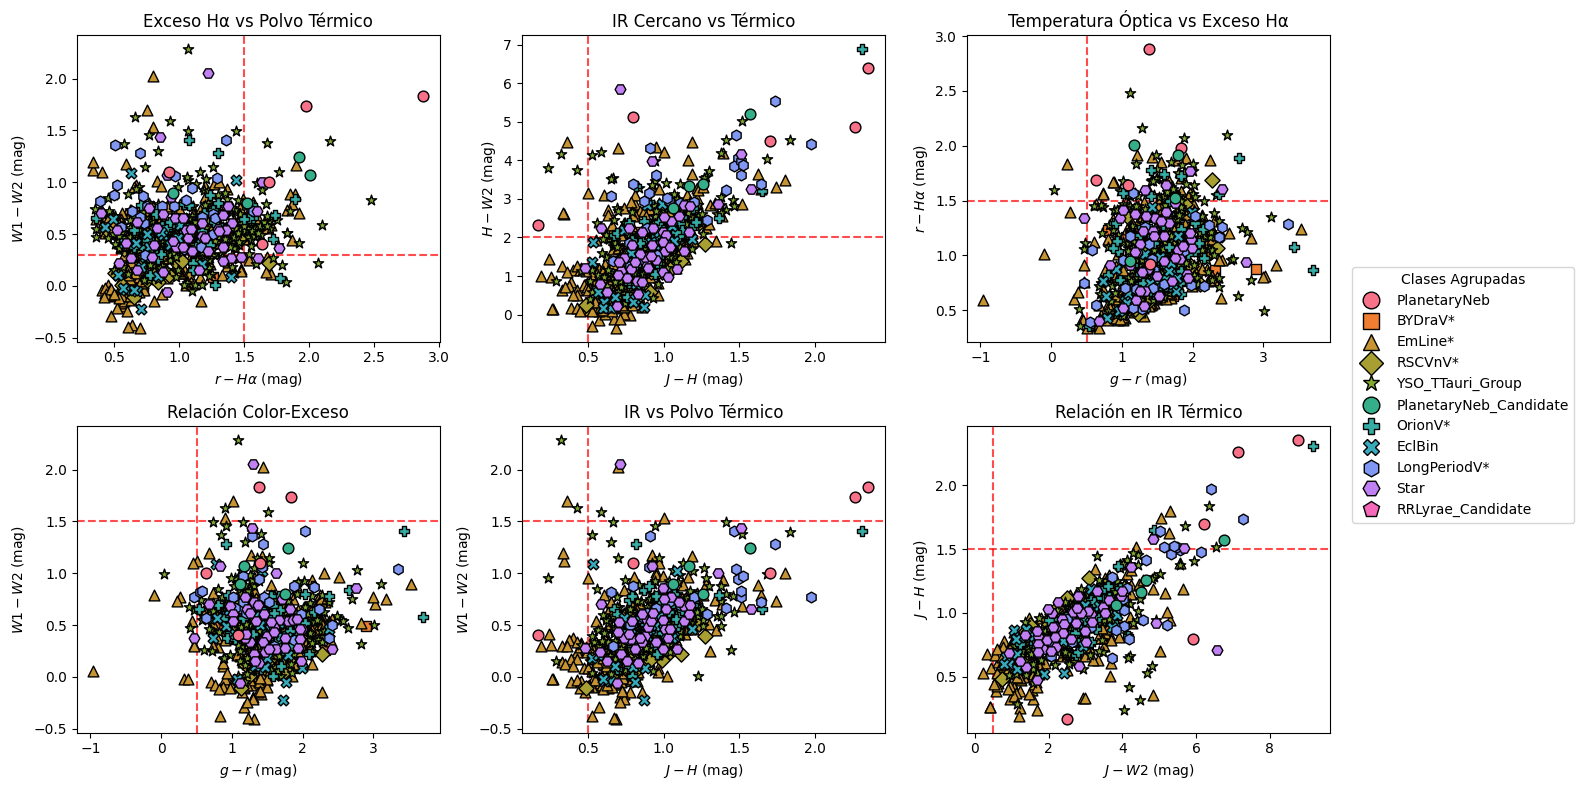

In [51]:


# 1. Definir marcadores, colores, clases, etc.
#    (asumo que ya tienes `unique_classes`, `grouped_color_dict` y `marker_dict`)

# 2. Crear subplots en formato 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

# 3. Añadir líneas guía según posición
for i, ax in enumerate(axes):
    if i == 0:
        ax.axvline(1.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(0.3, color='red', linestyle='--', alpha=0.7, zorder=1)
    elif i == 1:
        ax.axvline(0.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(2.0, color='red', linestyle='--', alpha=0.7, zorder=1)
    else:
        ax.axvline(0.5, color='red', linestyle='--', alpha=0.7, zorder=1)
        ax.axhline(1.5, color='red', linestyle='--', alpha=0.7, zorder=1)

# 4. Función corregida para graficar con zorder personalizado
def plot_with_zorder(ax, x, y, grouped_classes, color_dict, marker_dict, data):
    for cls in grouped_classes:
        subset = data[data['grouped_class'] == cls]
        # Solo estas dos clases encima
        if cls in ['PlanetaryNeb', 'PlanetaryNeb_Candidate']:
            z = 3
        else:
            z = 2
        ax.scatter(
            subset[x], subset[y],
            color=color_dict[cls],
            marker=marker_dict[cls],
            s=60,
            edgecolor='black',
            label=cls,
            zorder=z
        )

# 5. Graficar cada diagrama
# Diagrama 1
plot_with_zorder(axes[0], "r_Ha", "W1_W2", unique_classes,
                 grouped_color_dict, marker_dict, df_noise)
axes[0].set(xlabel=r"$r - H\alpha$ (mag)",
            ylabel=r"$W1 - W2$ (mag)",
            title="Exceso Hα vs Polvo Térmico")

# Diagrama 2
plot_with_zorder(axes[1], "J_H", "H_W2", unique_classes,
                 grouped_color_dict, marker_dict, df_noise)
axes[1].set(xlabel=r"$J - H$ (mag)",
            ylabel=r"$H - W2$ (mag)",
            title="IR Cercano vs Térmico")

# Diagrama 3
plot_with_zorder(axes[2], "g_r", "r_Ha", unique_classes,
                 grouped_color_dict, marker_dict, df_noise)
axes[2].set(xlabel=r"$g - r$ (mag)",
            ylabel=r"$r - H\alpha$ (mag)",
            title="Temperatura Óptica vs Exceso Hα")

# Diagrama 4
plot_with_zorder(axes[3], "g_r", "W1_W2", unique_classes,
                 grouped_color_dict, marker_dict, df_noise)
axes[3].set(xlabel=r"$g - r$ (mag)",
            ylabel=r"$W1 - W2$ (mag)",
            title="Relación Color-Exceso")

# Diagrama 5
plot_with_zorder(axes[4], "J_H", "W1_W2", unique_classes,
                 grouped_color_dict, marker_dict, df_noise)
axes[4].set(xlabel=r"$J - H$ (mag)",
            ylabel=r"$W1 - W2$ (mag)",
            title="IR vs Polvo Térmico")

# Diagrama 6
plot_with_zorder(axes[5], "J_W2", "J_H", unique_classes,
                 grouped_color_dict, marker_dict, df_noise)
axes[5].set(xlabel=r"$J - W2$ (mag)",
            ylabel=r"$J - H$ (mag)",
            title="Relación en IR Térmico")

# 6. Leyenda única
legend_elements = [
    Line2D([0], [0],
           marker=marker_dict[cls],
           color='w',
           markerfacecolor=grouped_color_dict[cls],
           markersize=12,
           markeredgecolor='black',
           label=cls,
           linestyle='None')
    for cls in unique_classes
]
fig.legend(handles=legend_elements,
           title="Clases Agrupadas",
           bbox_to_anchor=(0.75, 0.5),
           loc='center left',
           frameon=True)

# 7. Ajustes finales
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.savefig("../color-diagrams_noise.pdf")
plt.show()